# 正規方程式
$$
\theta = (\boldsymbol{X}^T\boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$
導出は以下のnotionのメモを参照  
https://www.notion.so/normal-equation-e61c88552d7249fab4c389620ac988eb

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("sample_data.csv")
x = df["space"].values
y = df["rent"].values

X = np.vstack([np.ones(len(x)), x]).T
X

array([[  1.,  20.],
       [  1.,  25.],
       [  1.,  28.],
       [  1.,  30.],
       [  1.,  36.],
       [  1.,  51.],
       [  1.,  55.],
       [  1.,  62.],
       [  1.,  83.],
       [  1., 103.]])

In [4]:
# 正規方程式の計算の実行
best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.T)
best_theta

array([7.0962325 , 0.27487161])

### 等高線を描画する

In [10]:
import matplotlib.pyplot as plt
from itertools import product

result_df = pd.read_csv("result.csv")
theta_0_history = result_df["theta_0"].values
theta_1_history = result_df["theta_1"].values
cost_history = result_df["cost"].values

def cost_func(theta_0, theta_1, x, y):
    # numpyの演算では、配列は自動的に各要素ごとの演算を行ってくれる。
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))

# 切片のパラメータであるtheta_0の範囲を適当に決める
min_theta_0 = -20
max_theta_0 = 20
# 傾きのパラメータであるtheta_1の範囲を適当に決める
min_theta_1 = -1
max_theta_1 = 1

# 軸のステップの数
n0 = n1 = 300

theta_0 = np.linspace(min_theta_0, max_theta_0, n0)
theta_1 = np.linspace(min_theta_1, max_theta_1, n1)

theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
z = [cost_func(param[0], param[1], x=x, y=y) for param in product(theta_0, theta_1)] # productメソッドは、それぞれの数字をかけ合わせた組み合わせをタプルで返す
Z = np.array(z).reshape(n0, n1)

Text(0, 0.5, 'theta 0')

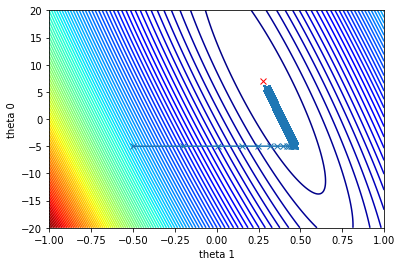

In [14]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap="jet")
plt.plot(theta_1_history, theta_0_history, "x-")
# 正規方程式より得た最適値を描画
plt.plot(best_theta[1], best_theta[0], "x-r")
plt.xlabel("theta 1")
plt.ylabel("theta 0")